# 📘 Scikit-Learn Essentials

In this notebook, we'll cover the core functionality of **scikit-learn**, including:
- Loading datasets
- Preprocessing and scaling data
- Training simple models
- Making predictions
- Evaluating results


In [1]:
# 📦 Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Matplotlib is building the font cache; this may take a moment.


## 📊 Load and explore the dataset (Digits)
We'll use the `load_digits` dataset which contains 8x8 images of digits (0–9).

In [5]:
digits = load_digits()
X = digits.data
y = digits.target
print("Shape of X:", X.shape)
print(X[0])
print("Target labels:", np.unique(y))

Shape of X: (1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Target labels: [0 1 2 3 4 5 6 7 8 9]


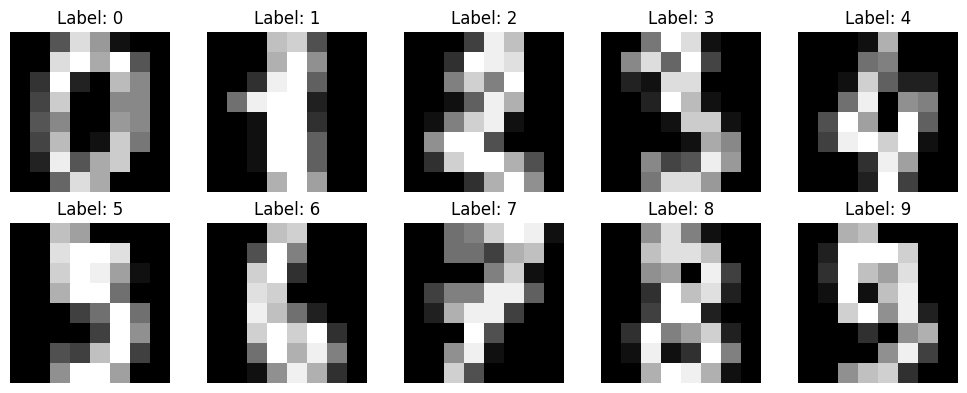

In [10]:
# Show some digits
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## ✂️ Split and scale the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Train a Logistic Regression model

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

## ✅ Evaluate the model

In [13]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



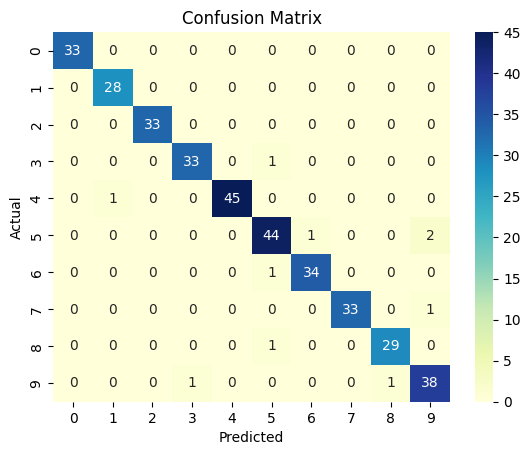

In [14]:
# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()